In [261]:
## Importing Libraries ##
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import xlrd
from sklearn import svm
import openpyxl
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.linear_model import TweedieRegressor
from numba import jit, njit, vectorize, cuda, uint32, f8, uint8
from timeit import default_timer as timer
from statsmodels.tsa.arima_model import ARMA
from datetime import datetime
from sklearn import *
import copy
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.svm import SVR
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.isotonic import IsotonicRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import svm
from sklearn.svm import LinearSVR
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

pd.options.display.max_columns = None
pd.options.display.max_rows = 50

In [262]:
## Declaring variables ##
df = pd.read_csv('mergedFiles.csv')

In [263]:
 df.head(50)

,Unnamed: 0,Byron Bay (Belongil Creek),Clarrie Hall Dam (Doon Doon Creek),Doon Doon (Mccabes Road),Dunoon,Goonengerry,Lacks Creek (Middle Pocket),Mullumbimby (Chincogan ),Mullumbimby (Upper Main Arm),Mullumbimby Creek (Mullumbimby Ck),Myocum,Repentance (Coopers Creek),The Channon,Uki (Tweed River),The Pocket (Marshalls Creek),Durrumbul (Brunswick River),Mullumbimby Creek (Mullumbimby Ck).1,Billinudgel (Marshalls Creek),Brunswick Heads (Tidal),error_one,error_two,error_three,error_four,Mullumbimby (Upper Main Arm).1,Goonengerry.1,Dunoon.1,Clarrie Hall Dam (Doon Doon Creek).1,Mullumbimby (Chincogan ).1,Mullumbimby Creek (Mullumbimby Ck).2,Lacks Creek (Middle Pocket).1,Repentance (Coopers Creek).1,Myocum.1,Uki (Tweed River).1,The Channon.1,Doon Doon (Mccabes Road).1,maxdiff,future_pred,prev,four
0,2006-02-27,2.00,336.00,18.00,2.50,13.75,3.25,19.50,14.00,12.00,60.00,7.50,14.50,20.50,3.356377,0.704510,0.286190,0.143596,0.523962,0.025357,0.018337,0.062179,0.123679,24.0,23.5,9.0,30.5,23.5,15.0,13.0,18.0,19.0,188.5,25.0,23.5,331.500000,0.236909,0.354532,0.305893
1,2006-02-28,9.25,44.75,30.00,11.50,18.00,28.25,18.50,31.00,13.00,15.00,25.50,21.50,39.25,3.588641,0.940333,0.557789,0.202347,0.576735,0.089048,0.087976,0.097183,0.139994,9.0,5.5,14.0,12.0,7.0,4.0,12.0,10.5,3.0,13.5,13.5,10.5,25.000000,1.346807,0.077123,0.343158
2,2006-03-01,4.25,11.25,15.50,14.00,7.50,9.00,6.00,7.25,7.50,1.00,9.75,13.00,12.25,3.573743,0.851842,0.775634,0.172127,0.587400,0.125768,0.132488,0.089970,0.034930,9.0,7.0,4.0,4.5,1.0,4.5,2.0,3.5,0.5,859.0,4.0,7.0,845.500000,1.414403,0.035000,0.375370
3,2006-03-02,3.50,4.00,6.75,3.00,5.50,0.50,1.00,7.75,2.50,4.00,3.25,2.00,6.50,3.613373,0.808222,0.365000,0.205472,0.559630,0.173360,0.179680,0.137453,0.079770,12.0,4.0,1.5,3.5,2.5,5.5,7.5,2.0,0.0,6.5,0.0,6.0,5.500000,1.182690,0.028571,0.399910
4,2006-03-03,26.50,33.50,62.50,41.00,60.50,24.50,41.50,61.50,45.00,52.00,43.75,42.50,52.00,3.689427,1.351440,0.741948,0.236909,0.556557,0.139805,0.147200,0.131772,0.079405,86.5,95.0,82.0,32.5,76.0,86.0,32.5,84.0,43.5,45.5,90.5,78.5,91.000000,0.588319,0.068889,0.353243
5,2006-03-04,67.25,60.00,95.25,91.00,95.50,57.50,81.00,98.00,91.50,75.50,87.00,93.00,53.25,4.529674,2.271065,0.864266,1.346807,0.555172,0.231723,0.230459,0.191017,0.127888,81.0,81.5,60.0,50.5,49.0,67.5,40.5,70.5,31.0,63.5,61.0,87.0,50.500000,0.091290,0.143596,0.345311
6,2006-03-05,76.00,43.25,120.50,61.25,99.50,62.75,73.00,88.25,74.50,84.50,73.25,71.50,38.50,4.629550,2.217235,0.832515,1.414403,0.476000,0.157017,0.166808,0.167491,0.123794,107.5,92.5,55.0,36.0,89.0,58.0,77.0,58.0,68.5,36.0,64.5,132.5,45.500000,0.095417,0.202347,0.359943
7,2006-03-06,51.25,20.75,81.50,41.75,52.00,46.25,49.50,67.75,35.75,45.00,32.50,37.50,21.75,4.238571,1.699590,0.645963,1.182690,0.361974,0.222144,0.217107,0.202261,0.154744,6.5,7.5,6.5,3.0,6.0,5.5,5.5,1.0,3.5,2.5,5.5,10.0,0.065128,0.088413,0.172127,0.350506
8,2006-03-07,0.00,1.50,6.00,1.00,0.50,1.00,0.00,0.50,0.25,0.00,2.50,1.50,2.00,4.098925,1.203293,0.527059,0.588319,0.310323,0.252628,0.258185,0.227199,0.160396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,13.500000,0.065283,0.205472,0.359931
9,2006-03-10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.678456,0.897021,0.429000,0.091290,0.316471,1.066834,1.078100,1.086635,0.657988,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.859437,0.054091,0.236909,0.354532


In [264]:
#df.corr().sort_values(by=['target'],ascending=False)

In [265]:
## Processing the data ## 
df['Unnamed: 0'] = pd.to_datetime(df['Unnamed: 0'])
df = df.set_index('Unnamed: 0')
df = df.dropna()

## Attribute selection ## 
#df = df[['error_one','error_two','error_three','error_four','target','future_pred','maxdiff']]

In [266]:
## Creating the training and testing variable ##
training_data  = df[df.index<datetime(2017, 3, 1)]
testing_data   = df[df.index>datetime(2017, 3, 1)]

In [267]:
## Defining Y and X values ## 
X_train = training_data.drop(['future_pred'], axis=1) 
y_train = training_data['future_pred']

## Defining Y and X values ## 
X_test = testing_data.drop(['future_pred'], axis=1) 
y_test = testing_data['future_pred']

In [273]:
## Building and fittinh the model ##
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import AdaBoostClassifier

## Setting model ## 
LR = GradientBoostingRegressor(
    n_estimators=2000, learning_rate=0.1, max_depth=1, random_state=0,
    loss='squared_error',criterion='squared_error')

## Fitting the training data ##
LR.fit(X_train,y_train) 

## Creating prediction ##
y_prediction = LR.predict(X_test) 
y_prediction[y_prediction < 0.0] = 0.0

## Calculating prediction and actual valus ##
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_prediction})

In [274]:
## Retrieving R2 Score, MSE, MAPE score ##
print("R2 Score is "  + str(r2_score(y_test, y_prediction)) +
      " ::: MSE Score is " + str(mean_absolute_error(y_test, y_prediction)) +
      " ::: MAPE Score is " + str(mean_absolute_percentage_error(y_test, y_prediction)))

R2 Score is -0.027819301539023567 ::: MSE Score is 0.12106694378791004 ::: MAPE Score is 0.32777100822210575


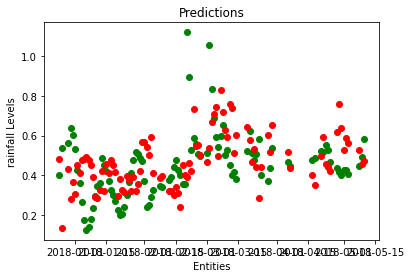

In [275]:
## Visualisation of predictions - Setting specifics for graph ##
fig = plt.figure()
ax1 = fig.add_subplot(111) 

## Visualisation of predictions - Creating graph ##
plt.title("Predictions")
plt.ylabel("rainfall Levels")
plt.xlabel("Entities")

## Plotting the graph ##
ax1.scatter(df1.index[200:300],df1.Actual[200:300].values,color='g')
ax1.scatter(df1.index[200:300],df1.Predicted[200:300].values, color='r')

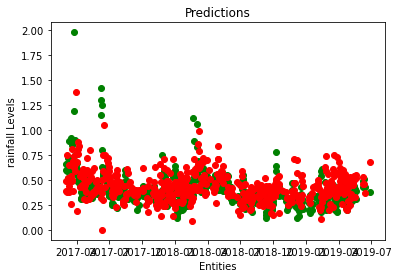

In [271]:
## Visualisation of predictions - Setting specifics for graph ##
fig = plt.figure()
ax1 = fig.add_subplot(111)

## Visualisation of predictions - Creating graph ##
plt.title("Predictions")
plt.ylabel("rainfall Levels")
plt.xlabel("Entities")
ax1.scatter(df1.index,df1.Actual.values,color='g')
ax1.scatter(df1.index,df1.Predicted.values, color='r')

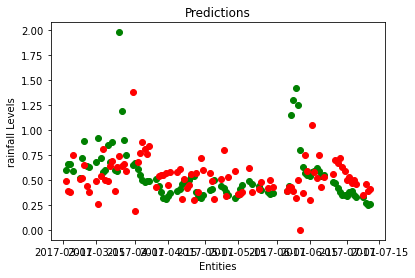

In [272]:
## Visualisation of predictions - Setting specifics for graph ##
fig = plt.figure()
ax1 = fig.add_subplot(111) 

## Visualisation of predictions - Creating graph ##
plt.title("Predictions")
plt.ylabel("rainfall Levels")
plt.xlabel("Entities")

## Plotting the graph ##
ax1.scatter(df1.index[0:100],df1.Actual[0:100].values,color='g')
ax1.scatter(df1.index[0:100],df1.Predicted[0:100].values, color='r')